In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Linear Regression

In [2]:
W = tf.Variable(tf.zeros([2, 1]), name="weights")
b = tf.Variable(0., name="bias")

define inference function for derive Y

In [3]:
def inference(X):
    return tf.matmul(X, W) + b

inputs is defined as below

In [4]:
def inputs():
    blood_fat_content = [354, 190, 405, 263, 451, 302,
                         288, 385, 402, 365, 209, 290,
                         346, 254, 395, 434, 220, 374,
                         308, 220, 311, 181, 274, 303,
                         244]

    weight_age = [[84, 46], [73, 20], [65, 52], [70, 30], [76, 57],
                  [69, 25], [63, 28], [72, 36], [79, 57], [75, 44],
                  [27, 24], [89, 31], [65, 52], [57, 23], [59, 60],
                  [69, 48], [60, 34], [79, 51], [75, 50], [82, 34],
                  [59, 46], [67, 23], [85, 37], [55, 40], [63, 30]]
    return tf.to_float(weight_age), tf.to_float(blood_fat_content)

Train function use learning rate = 0.0000001

In [5]:
def train(loss_function):
    alpha = 0.0000001
    return tf.train.GradientDescentOptimizer(alpha).minimize(loss_function)

Define loss function as squared error

In [6]:
def loss(X, Y):
    Y_hat = tf.transpose(inference(X))
    return tf.reduce_sum(tf.squared_difference(Y, Y_hat))

In evaluation use one sample as a test data that age is 25 and 
weight is 60 to 100

In [7]:
def evaluate(sess):
    weights = []
    fats = []
    for w in range(60, 100, 1):
        weights.append(w)
        fats.append((sess.run(inference([[float(w), 25.]])))[0])
    plt.plot(weights, fats)
    plt.ylabel('Fat')
    plt.xlabel('Weight')
    plt.show()

set W and b as a variable and use session to run !

In [8]:
W = tf.Variable(tf.zeros([2, 1]), name="weights")
b = tf.Variable(0., name="bias")

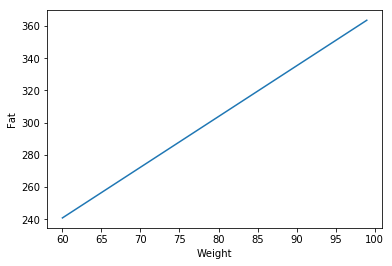

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

X_train, Y_train = inputs()
loss_func = loss(X_train, Y_train)
train_op = train(loss_func)

training_steps = 100
for epoch in range(training_steps):
    sess.run([train_op])

evaluate(sess)
sess.close()

## Logistic Regression

In [75]:
import pandas as pd

In [76]:
data = pd.read_csv('data/Titanic.csv')
data["Age"].fillna(0, inplace=True)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
W = tf.Variable(tf.zeros([5, 1]), name="weights")
b = tf.Variable(0., name="bias")

#### Inputs

In [78]:
data.replace({"Sex": {"male": 1, "female": 0}}, inplace=True)
# data = pd.get_dummies(data, columns=['Pclass'])
train_data = data.sample(frac=0.8, random_state=99)
test_data = data.loc[~data.index.isin(train_data.index), :]
X_train = train_data.loc[:, ['Pclass', 'Sex', 'Age']]
X_train = pd.get_dummies(X_train, columns=['Pclass'])
X_test = test_data.loc[:, ['Pclass', 'Sex', 'Age']]
X_test = pd.get_dummies(X_test, columns=['Pclass'])
Y_train = train_data.loc[:, ['Survived']]
Y_test = test_data.loc[:, ['Survived']]

In [79]:
def inference(X):
    return tf.sigmoid(tf.matmul(tf.cast(X, tf.float32), W) + b)

In [80]:
def loss(X, Y):
    Y_hat = tf.transpose(inference(X))
    return tf.reduce_sum(-1*tf.matmul(tf.cast(Y, tf.float32), tf.log(Y_hat)) + 
                         tf.matmul(tf.cast(Y - 1, tf.float32), tf.log(1-Y_hat)))

In [81]:
def train(loss_function):
    alpha = 0.01
    return tf.train.GradientDescentOptimizer(alpha).minimize(loss_function)

In [86]:
def evaluate_logistic_regression(sess, X_test, Y_test):
    # predicted = tf.cast(inference(X_test) > 0.5, tf.float32)
    print(sess.run(inference(X_test)))

In [85]:

x = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]))
y = tf.placeholder(dtype=tf.float32, shape=(None, Y_train.shape[1]))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
K = 500
training_steps = 10
for epoch in range(training_steps):
    for i in range(0, X_train.shape[0], K):
        loss_func = loss(X_train[i:i+K], Y_train[i:i+K])
        train_op = train(loss_func)
        sess.run(train_op, feed_dict={x: X_train[i:i+K], y: Y_train[i:i+K]})
        # print(i)
    print(epoch)

evaluate_logistic_regression(sess, X_test, Y_test)
sess.close()

0


1


2


3


4


5


6


7


8


9


[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]